<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Ol_de_PC02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PC02 - AGENTES INTELIGENTES

In [ ]:
##INTEGRANTES
#1. Cánepa Maceda, Jhafet Martin
#2. Quispe Ccorahua, Daniel

#INTEGRANTES
1. Cánepa Maceda, Jhafet Martin
2. Quispe Ccorahua, Daniel

#Ejercicio 1: Implementar uma arquitecturas de red neuronal profunda MLP con arquitectura diferente a las
dadas en clase

In [ ]:
import tensorflow as tf
from tensorflow import keras
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.14.0


#**Conjunto de datos**
Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta de 10 clases.

In [ ]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
## Estandarizar los datos
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.0

# Construcción del modelo



In [ ]:
model = keras.models.Sequential([
    #keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    #keras.layers.MaxPooling2D(2,2),
    #keras.layers.Conv2D(64,(3,3), activation='relu'),
    #keras.layers.MaxPooling2D(2,2),
    #keras.layers.Dropout(0.5),
    #keras.layers.Flatten(),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(512, activation='swish'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 784)               3136      
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 538954 (2.06 MB)
Trainable params: 537386 (2.05 MB)
Non-trainable params: 1568 (6.12 KB)
_________________

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#Uso de early stopping para evitar sobreajuste

In [ ]:
#------callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#---------------

#ENTRENAMIENTO DEL MODELO OFICIAL (MLP)

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[early_stopping_cb])
# alternativamente, especificar de manera explicita el tamaño del batch, y el validation_split
#       model.fit(X_train, y_train, epochs=225, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
1719/1719 [==============================] - 24s 13ms/step - loss: 0.4581 - accuracy: 0.8349 - val_loss: 0.3732 - val_accuracy: 0.8612
Epoch 2/100
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3437 - accuracy: 0.8711 - val_loss: 0.3205 - val_accuracy: 0.8864
Epoch 3/100
1719/1719 [==============================] - 21s 12ms/step - loss: 0.3069 - accuracy: 0.8836 - val_loss: 0.3193 - val_accuracy: 0.8854
Epoch 4/100
1719/1719 [==============================] - 22s 13ms/step - loss: 0.2785 - accuracy: 0.8962 - val_loss: 0.3317 - val_accuracy: 0.8834
Epoch 5/100
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2541 - accuracy: 0.9045 - val_loss: 0.3446 - val_accuracy: 0.8856
Epoch 6/100
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2379 - accuracy: 0.9092 - val_loss: 0.3039 - val_accuracy: 0.8906
Epoch 7/100
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2221 - accuracy: 0.9155 - val_loss: 0

#PLOTAR VALIDACIÓN VS TRAINING LOSS

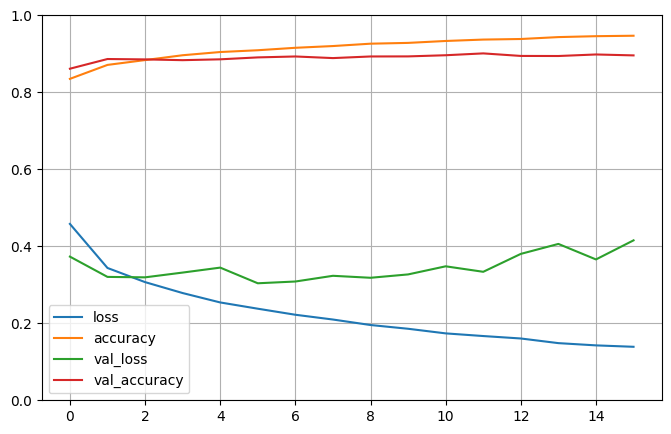

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

#MODELO CON MEJOR ACCURACY EN EL CONJUNTO DE TEST/ ERROR EN EL CONJUNTO DE TEST

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8869


[0.3359677493572235, 0.886900007724762]

#PREDICCIONES

#Primeras 3 predicciones

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 83ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(X_new) ,axis=1)
print(y_pred)
print(y_test[0:3])

1/1 [==============================] - 0s 21ms/step
[9 2 1]
[9 2 1]


#Primeras 20 predicciones

In [ ]:
X_new = X_test[:20]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 23ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.28, 0.  , 0.01, 0.  , 0.  , 0.  , 0.71, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.  , 0.98, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.76, 0.  , 0.24, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.31, 0.  , 0.

In [ ]:
import numpy as np
y_pred=np.argmax(model.predict(X_new) ,axis=1)
print(y_pred)
print(y_test[0:20])

1/1 [==============================] - 0s 30ms/step
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


#Ilustración de predicción correcta e incorrecta

In [ ]:
nombres_clases = ["Camiseta/top", "Pantalón", "Suéter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla deportiva", "Bolso", "Botines"]

313/313 [==============================] - 1s 3ms/step


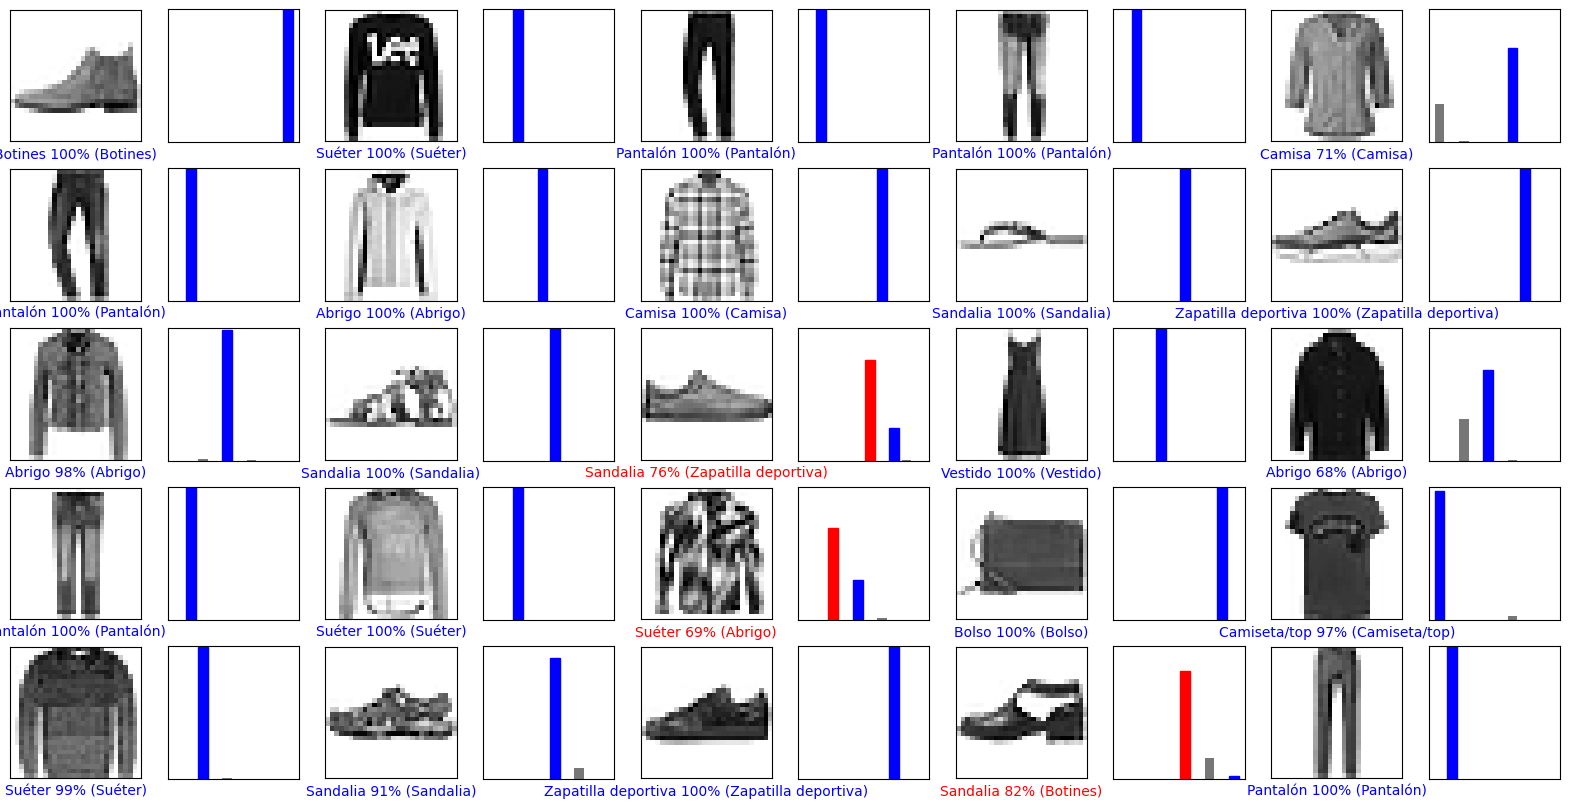

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener predicciones para las imágenes de prueba
predicciones = model.predict(X_test)

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                       100 * np.max(arr_predicciones),
                                       nombres_clases[etiqueta_real]),
             color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas * columnas
plt.figure(figsize=(2 * 2 * columnas, 2 * filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2 * columnas, 2 * i + 1)
  graficar_imagen(i, predicciones, y_test, X_test)
  plt.subplot(filas, 2 * columnas, 2 * i + 2)
  graficar_valor_arreglo(i, predicciones, y_test)

plt.show()

#3. Implementar una arquitectura de red neuronal profunda MLP para regresión

#USAR EL BOSTON HOUSE REGRESSION DATASET

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# Boston Housing Price
boston = fetch_openml(name='boston')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
# División en entrenamiento/validación/test
X_train_full, X_test, y_train_full, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
# Escalamiento de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

#CONSTRUCCIÓN DEL MODELO

In [ ]:
# MLP para regresión
model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=X_train.shape[1:]),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(1)
    #############################3
    #keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    #keras.layers.Dense(30, activation="relu"),
    #keras.layers.Dense(1)
])

In [ ]:
# Resumen del modelo
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 30)                420       
                                                                 
 dense_58 (Dense)            (None, 1000)              31000     
                                                                 
 dense_59 (Dense)            (None, 500)               500500    
                                                                 
 dense_60 (Dense)            (None, 300)               150300    
                                                                 
 dense_61 (Dense)            (None, 1)                 301       
                                                                 
Total params: 682521 (2.60 MB)
Trainable params: 682521 (2.60 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilación del modelo para regresión
model.compile(loss="mean_squared_error", optimizer="adam")

In [ ]:
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
11/11 [==============================] - 2s 40ms/step - loss: 342.6171 - val_loss: 117.3115
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 68.1252 - val_loss: 75.9762
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 45.6263 - val_loss: 31.8682
Epoch 4/100
11/11 [==============================] - 0s 18ms/step - loss: 26.2130 - val_loss: 30.5416
Epoch 5/100
11/11 [==============================] - 0s 19ms/step - loss: 20.2050 - val_loss: 24.0942
Epoch 6/100
11/11 [==============================] - 0s 17ms/step - loss: 17.9396 - val_loss: 23.0221
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 15.8190 - val_loss: 20.1552
Epoch 8/100
11/11 [==============================] - 0s 18ms/step - loss: 14.5395 - val_loss: 25.6491
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 16.6461 - val_loss: 20.4418
Epoch 10/100
11/11 [==============================] - 0s 17ms/step - loss: 13.92

#PLOTAR VALIDATION VS TRAINING LOSS

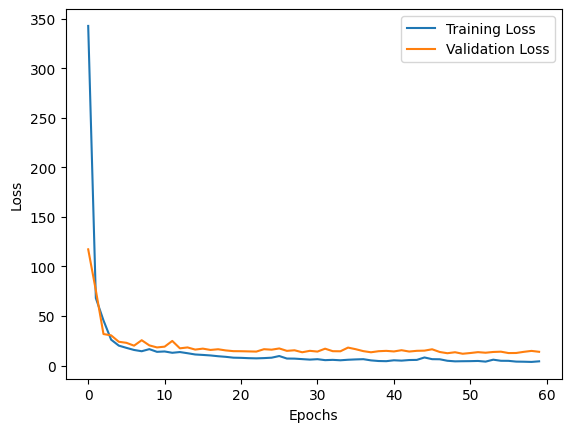

In [ ]:
# Grafica de la pérdida en los conjuntos de entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#PRESENTACIÓN DEL ERROR EN EL CONJUNTO DE TEST

In [ ]:
# Evaluación del modelo en el conjunto de test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error en el conjunto de test (MSE):", mse)

4/4 [==============================] - 0s 4ms/step
Error en el conjunto de test (MSE): 9.445124822673009


#Predicciones

In [ ]:
# realizar algunas predicciones
X_new = X_test[:3]
y_pred = model.predict(X_new)
print("predicciones",y_pred)
print("labels",y_test[:3])

1/1 [==============================] - 0s 26ms/step
predicciones [[27.095243]
 [35.796764]
 [16.396395]]
labels 173    23.6
274    32.4
491    13.6
Name: MEDV, dtype: float64


#MODELO CON MENOR ERROR EN EL CONJUNTO DE TEST

In [ ]:
# Modelo con menor error en el conjunto de test
model.save("my_regression_model.h5")

best_model = keras.models.load_model("my_regression_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
